In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
## part 2 , fig 1
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import statistics as st
import pandas as pd
import json
import numpy as np
from matplotlib import rcParams
import statistics
import statistics as st
import random
import numpy as np
import glob
random.seed(1234)
##plotting styles
plt.style.use(['default'])
mp.rcParams['pdf.fonttype'] = 42
mp.rcParams['ps.fonttype'] = 42
plt.rc('axes', axisbelow=True)
##getting data


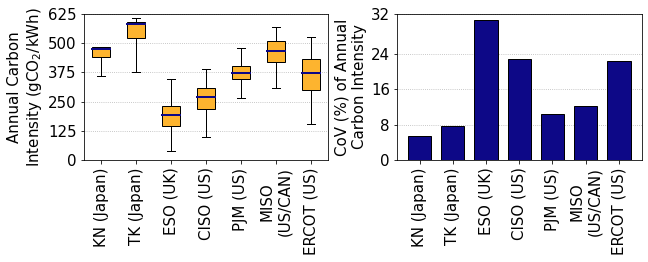

In [3]:
regions = ['KN', 'TK', 'ESO','CISO', 'PJM', 'MISO', 'ERCO']
regions_1 = ['KN (Japan)', 'TK (Japan)', 'ESO (UK)','CISO (US)', 'PJM (US)', 'MISO\n(US/CAN)', 'ERCOT (US)']

df_list = []
for i in regions:
    csv_file = glob.glob(f'./csv/*-{i}.csv')[0]
    df_list.append(pd.read_csv(csv_file))
df_list[0]['carbon_intensity_avg'].to_numpy()
carbon_intensities = []
for df in df_list:
    try:
        ci = df['carbon_intensity_avg'].to_numpy()
        ci = ci[~np.isnan(ci)] # remove NaN
    except:
        ci = df['carbon_intensity_production_avg'].to_numpy()
        ci = ci[~np.isnan(ci)] # remove NaN
    carbon_intensities.append(ci)
##plotting
barWidth=0.7
fig = mp.figure(figsize=(10,2.7))
mp.subplots_adjust(wspace=0.28, hspace=0.2)
##box plot
axs = mp.subplot(121)
bplot = axs.boxplot(carbon_intensities, whis=10, showfliers=False, widths=0.5, patch_artist=True, zorder=2)
for patch in bplot['boxes']:
    patch.set_facecolor('#fdb42f')
#    patch.set_edgecolor('blue')
for patch in bplot['medians']:
    patch.set_color('#0d0887')
    patch.set_linewidth(2)
    patch.set_linestyle('-')
axs.tick_params(labelsize=15)
axs.set_ylim([0,625])
axs.set_yticks([0,125,250,375,500,625])
axs.set_ylabel('Annual Carbon\nIntensity (gCO$_2$/kWh)', fontsize=15)#, y=0.32)
axs.set_xticklabels(regions_1, rotation=90, fontsize=15)
axs.grid(which='major', axis='y', ls='dotted', zorder=0)
##bar plot
axs = mp.subplot(122)
cov_list=[]
for i in range(len(carbon_intensities)):
    cov_list.append(np.std(carbon_intensities[i], ddof=1) / np.mean(carbon_intensities[i]) * 100)
plt.bar([i for i in range(len(cov_list))],cov_list, width = barWidth, color = '#0d0887', edgecolor = 'black',capsize=15, label='DayDream')
axs.set_axisbelow(True)
axs.set_xticks([0,1,2,3,4,5,6])
axs.set_xticklabels(regions_1, rotation=90, fontsize=15)
axs.set_ylim([0,33])
axs.set_yticks([0,8,16,24,33])
axs.set_yticklabels(["0", "8", "16", "24", "32"])
axs.set_ylabel("CoV (%) of Annual\nCarbon Intensity" , fontsize=15)#, y=0.4)
axs.tick_params(labelsize=15)
axs.grid(which='major', axis='y', ls='dotted', zorder=0)
plt.savefig("../figures/regionwise_carbon_intensity.pdf", bbox_inches="tight")

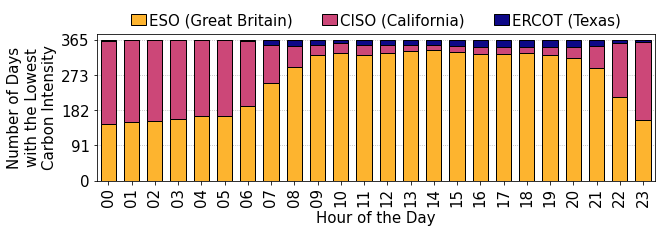

In [4]:
plt.rc('axes', axisbelow=True)
##getting data
cal = pd.read_csv("./csv/US-CAL-CISO.csv")
mida = pd.read_csv("./csv/US-MIDA-PJM.csv")
midw = pd.read_csv("./csv/US-MIDW-MISO.csv")
tex = pd.read_csv("./csv/US-TEX-ERCO.csv")
uk = pd.read_csv("./csv/UK-ESO.csv")
tk = pd.read_csv("./csv/JP-TK.csv")
kn = pd.read_csv("./csv/JP-KN.csv")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hourlyReg = []
for i in range(24):
    tempLow = []
    for j in range(363):
        lowTk = tk['carbon_intensity_production_avg'].values[24*j + i]
        lowKn = kn['carbon_intensity_production_avg'].values[24*j + i]
        lowUk = uk['carbon_intensity_production_avg'].values[24*j + i + 9]
        lowEast = mida['carbon_intensity_production_avg'].values[24*j + i + 14]
        lowTex = tex['carbon_intensity_production_avg'].values[24*j + i + 15]
        lowCal = cal['carbon_intensity_production_avg'].values[24*j + i + 17]
        lowWest = midw['carbon_intensity_production_avg'].values[24*j + i + 17]
        lowReg = [lowTk, lowKn, lowUk, lowEast, lowTex, lowCal, lowWest]
        tempLow.append(np.where(lowReg == min(lowReg))[0][0])
    hourlyReg.append(tempLow)
tkNum = []
knNum = []
ukNum = []
eastNum = []
texNum = []
calNum = []
westNum = []
for i in range(24):
    tkNum.append(hourlyReg[i].count(0))
    knNum.append(hourlyReg[i].count(1))
    ukNum.append(hourlyReg[i].count(2))
    eastNum.append(hourlyReg[i].count(3))
    texNum.append(hourlyReg[i].count(4))
    calNum.append(hourlyReg[i].count(5))
    westNum.append(hourlyReg[i].count(6))
tkNum = np.asarray(tkNum)
knNum = np.asarray(knNum)
ukNum = np.asarray(ukNum)
eastNum = np.asarray(eastNum)
texNum = np.asarray(texNum)
calNum = np.asarray(calNum)
westNum = np.asarray(westNum)
##plotting
barWidth=0.65
fig = mp.figure(figsize=(10,2.7))
mp.subplots_adjust(wspace=0.25, hspace=0.2)
ax = mp.subplot(111)
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
ax.bar(hours, ukNum, width = barWidth, color='#fdb42f',edgecolor = 'black',capsize=15, label='ESO (Great Britain)')
ax.bar(hours, calNum, width = barWidth, color='#cc4778', bottom=ukNum, edgecolor = 'black',capsize=15, label='CISO (California)')
ax.bar(hours, texNum, width = barWidth, color='#0d0887', bottom=ukNum+calNum, edgecolor = 'black',capsize=15, label='ERCOT (Texas)')
ax.set_ylim(0,380)
ax.set_axisbelow(True)
ax.set_xticks(hours)
ax.set_xticklabels(hours, rotation=90, fontsize=15)
ax.set_xlim([-0.5,23.5])
ax.set_xlabel("Hour of the Day" , fontsize=15)
ax.set_yticks([0,91,182,273,365])
ax.set_ylabel("Number of Days\nwith the Lowest\nCarbon Intensity" , fontsize=15)#, y=0.4)
ax.tick_params(labelsize=15)
ax.grid(which='major', axis='y', ls='dotted', zorder=0)
ax.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0.05,1.,0.9,0.8),ncol=3,fontsize=15, borderaxespad=0, frameon=False)
plt.savefig("../figures/hour_of_day_lowest_carbon.pdf", bbox_inches="tight")